In [1]:
from patch14 import find_query_text
import os
link_database = r"database.lance"
model = find_query_text(link_database)

c:\Users\minhh\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
C:\Users\minhh\.cache\huggingface\modules\transformers_modules\nomic-ai\nomic-bert-2048\4bb68f63016e88e53e48df904c6ab4e6f718e198\modeling_hf_nomic_bert.py:98: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flippe

In [ ]:
import json
with open("summaries.json", "r", encoding="utf-8") as f:
    summaries_list = json.load(f)

In [ ]:
model.add_to_database_video(summaries_list)

In [ ]:
import os
import csv
import glob
link_pictures = []
captions = []
directory_paths, cation_paths = glob.glob(".\\keyframes\\L*"), glob.glob(".\\image-captioning\\L*\\L*")
for directory_path, cation_path in zip(directory_paths, cation_paths):
    assert directory_path.rsplit('\\', 1)[1] == cation_path.rsplit('\\', 1)[1][:-4], 'Name must match!'
    files = os.listdir(directory_path)
    for file in files:
        full_path = os.path.join(directory_path, file)
        link_pictures.append(full_path)
    with open(cation_path, newline='') as csvfile:
        csvreader = csv.DictReader(csvfile)
        for row in csvreader:
            captions.append(row['caption'])

print(len(link_pictures))
print(len(captions))


In [ ]:
import lancedb
import pandas as pd
db = lancedb.connect(r"database.lance")
table = db.open_table("patch14")
table.to_pandas()


In [ ]:
model.add_to_database(link_pictures, captions)

In [ ]:
table = db.open_table("patch14")
table.to_pandas()

In [2]:
import matplotlib.pyplot as plt

def show_images_grid(image_path_list, columns=5):
    """
    Displays images from a list of paths in a grid.

    Args:
        image_path_list: A list of image file paths.
        columns: The number of columns in the grid.
    """

    rows = (len(image_path_list) + columns - 1) // columns
    fig, axs = plt.subplots(rows, columns, figsize=(15, 15))

    for i, path in enumerate(image_path_list):
        row, col = i // columns, i % columns
        axs[row, col].imshow(plt.imread(path))
        axs[row, col].set_title(path)
        axs[row, col].axis('off')

    plt.tight_layout()
    plt.show()

c:\Users\minhh\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\models\clip\modeling_clip.py:480: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


.\keyframes\L09_V017\208.jpg
.\keyframes\L09_V017\206.jpg
.\keyframes\L09_V017\207.jpg
.\keyframes\L09_V017\205.jpg
.\keyframes\L09_V017\188.jpg
.\keyframes\L09_V017\187.jpg
.\keyframes\L07_V018\239.jpg
.\keyframes\L09_V001\219.jpg
.\keyframes\L06_V028\312.jpg
.\keyframes\L06_V005\191.jpg
.\keyframes\L07_V018\231.jpg
.\keyframes\L07_V018\230.jpg
.\keyframes\L09_V028\348.jpg
.\keyframes\L06_V005\184.jpg
.\keyframes\L07_V031\222.jpg
.\keyframes\L09_V017\189.jpg
.\keyframes\L09_V017\203.jpg
.\keyframes\L02_V016\046.jpg
.\keyframes\L09_V028\347.jpg
.\keyframes\L08_V011\161.jpg
.\keyframes\L07_V031\224.jpg
.\keyframes\L06_V005\193.jpg
.\keyframes\L09_V017\200.jpg
.\keyframes\L05_V023\234.jpg
.\keyframes\L09_V017\201.jpg


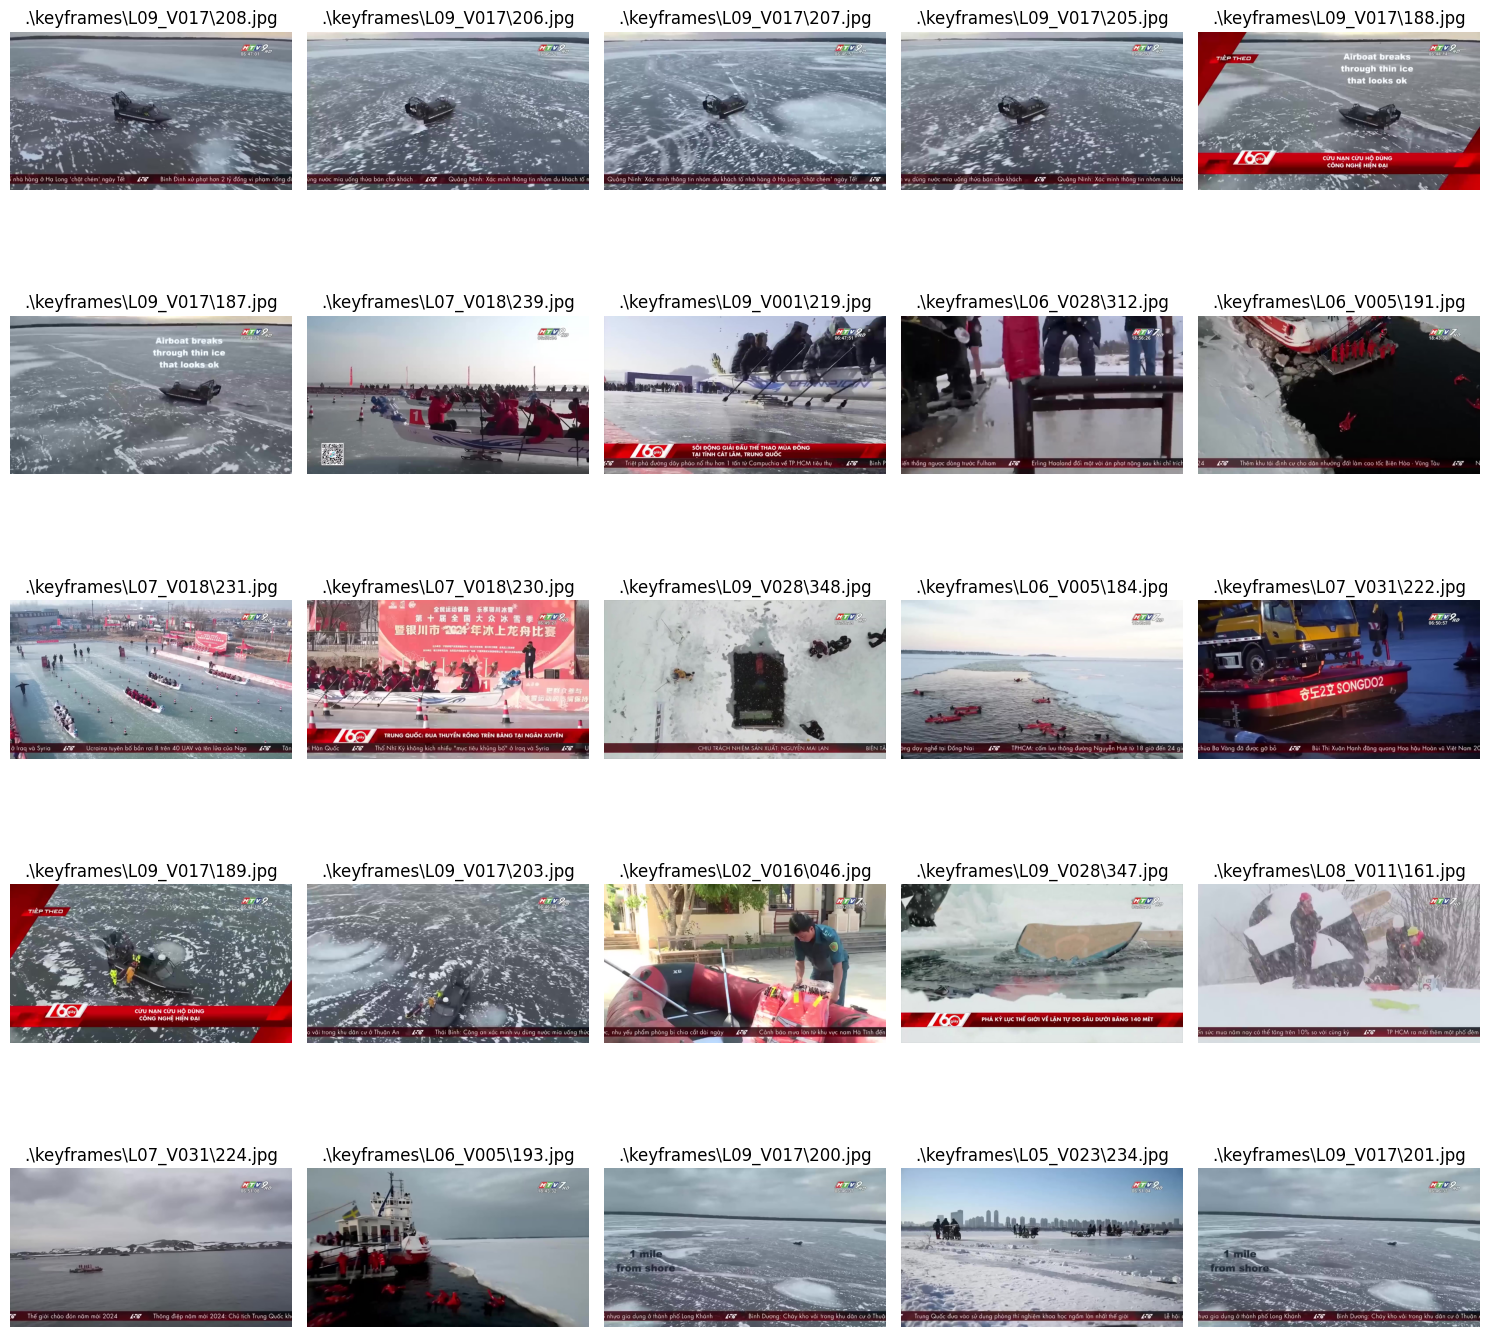

In [3]:
pathlist = model.find_query_by_embedding("A black boat can run on ice. This boat is powered by a propeller on top that blows air backwards. The boat is a rescue vehicle to help a victim who has fallen into an ice lake.")

show_images_grid(pathlist)